## Numpy 기초

### Numpy, pyplot 모듈 import

In [30]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

### Numpy 배열, 행렬 만들기

In [31]:
vector = np.array([1,2,3,4,5])
vector

array([1, 2, 3, 4, 5])

In [32]:
vector2 = np.arange(1,6)
vector2

array([1, 2, 3, 4, 5])

In [33]:
matrix = np.array([[1,2,3],
                  [4,5,6]])
matrix

array([[1, 2, 3],
       [4, 5, 6]])

벡터든 행렬이든 모두 numpy 배열이라고 부릅니다.  

n 차원 배열과  n 차원 텐서(Tensor)는 같은 의미입니다.

배열의 구조(모양)을 확인 할 때는 다음과 같이 합니다.

In [34]:
matrix.shape   # 2 x 3 행렬

(2, 3)

### Numpy 로 정규분포를 따르는 난수 행렬 만들기

난수라도 매번 같은 결과를 얻고 싶다거나 디버깅이 필요할 때는 난수의 seed 값을 설정합니다.

In [35]:
np.random.seed(378)

정규분포란 어떤 평균값 $\mu$  을 중심으로 데이터가 모여있고 그 퍼진 정도(표준편차)가 $\sigma$ 로 결정되는 확률분포입니다.

수식은 다음과 같이 표현됩니다.

$f(x,\mu ,\sigma )={\frac {1}{\sqrt {2\pi \sigma ^{2}}}}e^{-{\frac {(x-\mu )^{2}}{2\sigma ^{2}}}}$

Numpy 에서는 정규분포(normal distribution)을 따르는 난수를 다음과 같이 만들 수 있습니다.

In [36]:
np.random.normal(0, 1, (3,5))

array([[-0.57436385,  0.12067547, -0.48255857, -0.10268653,  0.77463195],
       [ 0.78077981,  0.53582766, -0.22820869,  0.62991329,  1.14836419],
       [-0.61761069,  0.98340769, -0.17401183,  2.45259506, -1.04132305]])

np.random.normal( 평균값(mu),  표준편차(sigma),  배열 모양 ) 

위와 같이 배열의 모양을 지정해서 난수를 만드는 기술을 머신러닝에서 가중치를 초기화할 때 사용하기도 합니다.

----

## 미션1

## 정규분포(mu=0, sigma=1) 난수 10000개를 만들어서 히스토그램 그리기

In [37]:
data = np.random.normal(0, 1, 10000)

In [38]:
data.shape

(10000,)

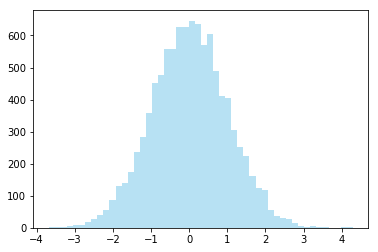

In [39]:
plt.hist(data, bins=50, histtype='bar', color='skyblue', alpha=0.6)
plt.show()

난수 샘플의 평균값이 0인 것은 쉽게 알 수가 있습니다. 

막대기의 높이를 다 더하면 전체 샘플의 갯수인 10000이 됩니다.

이 샘플의 표준편차가 1인데 이 말은  -2 에서 +2 구간에서 95% 이상의 샘플이 존재한다는 의미입니다.

표준편차가 2 인 샘플의 히스토 그램과 겹쳐서 그려서 비교해보겠습니다.

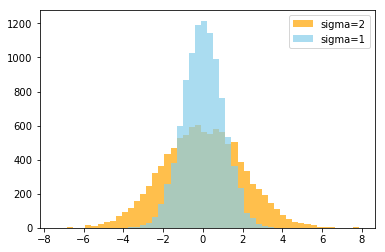

In [40]:
data2 = np.random.normal(0, 2, 10000)

plt.hist([data, data2], bins=50, histtype='stepfilled', color=['skyblue', 'orange'], alpha=0.7,
        label=['sigma=1', 'sigma=2'])
plt.legend(loc=0)
plt.show()

표준편차(sigma)가 큰 데이터의 샘플이 더 넓은 폭을 가지고 분포하고 있는 것을 알 수 있습니다.

## 미션2

##  점(1,1)와 점 (5,5)을 중심으로 각각의 표준편차가 1과 2 가 되도록 <br>정규분포 난수를 발생시켜서 산포도 그래프 그리기

좌표 (1, 1) 위치에서 높이 10cm 인 곳에서 모래를 떨어트리면 좌표 (1,1)을 중심으로 모래가 쌓입니다.  중심에 가까울 수록 쌓은 모래의 높이가 높습니다.

높이 30cm 에서 모래를 떨어트리면 모래가 더 넢은 면적으로 쌓입니다. 그 대신 중심 좌표에서의 모래의 높이는 낮아집니다.

여기서 모래를 뿌리는 좌표가 평균값이 되고 모래를 뿌리는 높이가 모래 분포의 표준편차를 결정합니다.

2차원 평면 위에 모래를 뿌리니 모래의 좌표는 두 개의 변수를 갖습니다.  (x, y) 라고 놓고 각각의 변수에 정규분포 난수를 넣으면 위에서 설명한 분포를 얻을 수 있습니다.

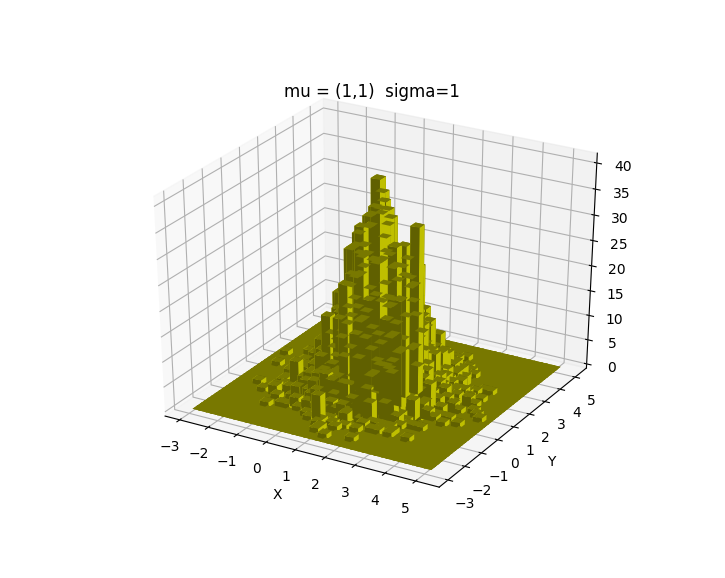

In [54]:
from IPython.display import Image
Image(filename='../images/figures/fig_normal_distribution_3d.png', width=500) 

In [41]:
numPts = 2000

(1,1)을 중심으로하고 표준편차가 1인 좌표의 샘플을 먼저 구하겠습니다.

샘플의 사이즈는 2000 으로 정했습니다.

In [42]:
Ax = np.random.normal(1, 1, numPts)
Ay = np.random.normal(1, 1, numPts)

산포도(scatter) 그래프를 그리는 방법입니다.

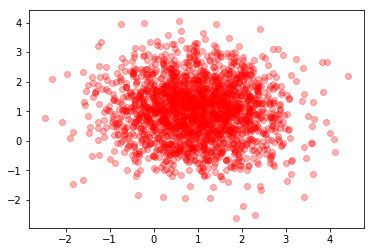

In [43]:
plt.scatter(Ax, Ay, color='r', alpha=0.3)
plt.show()

(3,3)을 중심으로하고 표준편차가 2인 좌표의 샘플을 먼저 구하겠습니다.

앞에서는 x 좌표와 y 좌표에 대한 난수 샘플을 각각 계산했지만 이번에는 한 번에 생성하겠습니다.



In [44]:
B = np.random.normal(5, 2, (numPts, 2))

B 는 numPts 행 2 열인 행렬입니다.  B 의 첫 번째 열을 x 좌표 두 번째 열을 y 좌표로 생각하겠습니다.

B에 대한 산포도도 그려보겠습니다.

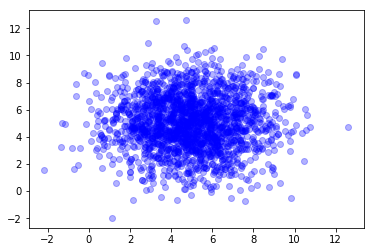

In [53]:
plt.scatter(B[:,0], B[:,1], color='b', alpha=0.3)
plt.show()

두 그래프의 범위가 드리기 때문에 화면에 보이는 크기로는 모래의 퍼진 정도를 비교하기 어렵습니다.   

같은 화면(figure)에 그려보겠습니다.

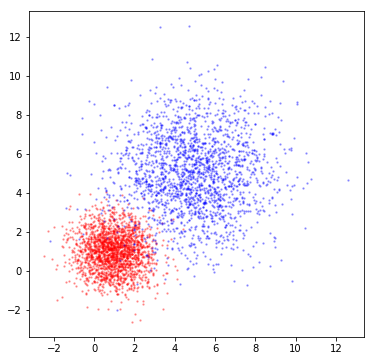

In [52]:
plt.figure(figsize=(6,6))
plt.scatter(Ax, Ay, color='r', s=2, alpha=0.3)
plt.scatter(B[:,0], B[:,1], color='b', s=2, alpha=0.3)
plt.show()

나중에 비지도 학습으로 빨간점과 파란점에서 색깔 정보가 없어도 머신러닝으로 어느정도 두 그룹을 분리할 수 있습니다.

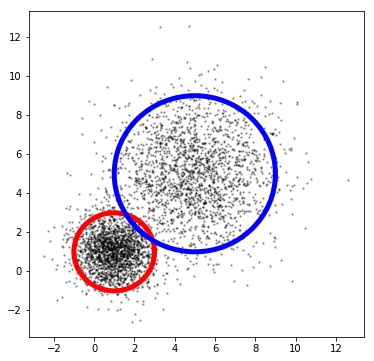

In [58]:
plt.figure(figsize=(6,6))
plt.scatter(Ax, Ay, color='k', s=2, alpha=0.3)
plt.scatter(B[:,0], B[:,1], color='k', s=2, alpha=0.3)
ax = plt.gca()
circle1 = plt.Circle((1, 1), 1*2, color='r', lw=5, fill=False)
circle2 = plt.Circle((5, 5), 2*2, color='b', lw=5, fill=False)
ax.add_artist(circle1)
ax.add_artist(circle2)

plt.show()